# Práctica I: Python
## Ana Fernández Cruz y Jesús Gallego Olivas

## Práctica 1: Python para la ciencia de datos – Análisis del fichero mundo

El objetivo de esta práctica es utilizar los conocimientos adquiridos en la asignatura para realizar un análisis de distintas características de la población mundial basándonos en el fichero mundo.csv. La práctica se realizará en grupos de 2 personas y corresponde a un 50% de la nota de la asignatura. La fecha límite de entrega será el 23/11/2019 a las 23:59. Se permite la entrega hasta una semana después (30/11/2019), pero las prácticas que se entreguen en fechas posteriores al 23/11 tendrán como máximo una puntuación de 8 puntos. La entrega consistirá en un notebook de Python en el que se incluyan las respuestas a las preguntas planteadas, así como el código desarrollado para responderlas.

El fichero consta de una tabla con 26 columnas y 110 filas que contienen datos referentes a varias características de la población mundial. Se pide al alumno que, una vez leídos los datos, realice las siguientes operaciones con ellos:

1. Uno de los primeros pasos para realizar un buen análisis de datos es familiarizarnos con los datos que contiene el fichero a analizar. Para ello, calcularemos los estadísticos descriptivos elementales de las variables del fichero. Una vez cargados los datos en nuestro programa Python (utilizando la librería Pandas), calcula los siguientes valores para cada una de las variables:

    - Número de muestras (valores distintos de missing)
    - Media y desviación estándar
    - Valor mínimo y valor máximo

In [9]:
import pandas as pd
import numpy as np
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 999)

In [11]:
#Cargamos y mostramos el csv
df = pd.read_csv("mundo.csv")
df

,pa_s,poblac,densidad,urbana,relig,espvidaf,espvidam,alfabet,inc_pob,mortinf,pib_cap,regi_n,calor_as,sida,tasa_nat,tasa_mor,tasasida,log_pib,logtsida,nac_def,fertilid,log_pob,alfabmas,alfabfem,clima,region2
0,Acerbaján,7400,86.0,54.0,Musulma.,75,67,98.0,1.40,35.0,3000,5,NaN,NaN,23.0,7.0,NaN,3.477121,NaN,3.285714,2.80,3.869232,100.0,100.0,3.0,5.0
1,Afganistán,20500,25.0,18.0,Musulma.,44,45,29.0,2.80,168.0,205,3,NaN,0.0,53.0,22.0,0.000000,2.311754,0.000000,2.409091,6.90,4.311754,44.0,14.0,3.0,3.0
2,Alemania,81200,227.0,85.0,Protest.,79,73,99.0,0.36,6.5,17539,1,3443.0,11179.0,11.0,11.0,13.767241,4.244005,1.689544,1.000000,1.47,4.909556,NaN,NaN,8.0,1.0
3,Arabia Saudí,18000,7.7,77.0,Musulma.,70,66,62.0,3.20,52.0,6651,5,2874.0,61.0,38.0,6.0,0.338889,3.822887,0.805400,6.333333,6.67,4.255273,73.0,48.0,1.0,5.0
4,Argentina,33900,12.0,86.0,Católica,75,68,95.0,1.30,25.6,3408,6,3113.0,3904.0,20.0,9.0,11.516224,3.532500,1.630279,2.222222,2.80,4.530200,96.0,95.0,8.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,Uruguay,3200,18.0,89.0,Católica,77,71,96.0,0.80,17.0,3131,6,2653.0,469.0,17.0,10.0,14.656250,3.495683,1.710821,1.700000,2.44,3.505150,97.0,96.0,8.0,6.0
105,Uzbekistán,22600,50.0,41.0,Musulma.,72,65,97.0,2.13,53.0,1350,5,NaN,2.0,30.0,7.0,0.009050,3.130334,0.390236,4.285714,3.73,4.354108,100.0,100.0,2.0,5.0
106,Venezuela,20600,22.0,91.0,Católica,76,70,88.0,2.16,28.0,2829,6,2582.0,3511.0,26.0,5.0,16.483568,3.451633,1.751500,5.200000,3.05,4.313867,90.0,87.0,5.0,6.0
107,Vietnam,73100,218.0,20.0,Budista,68,63,88.0,1.78,46.0,230,3,2233.0,107.0,27.0,8.0,0.146375,2.361728,0.680916,3.375000,3.33,4.863917,93.0,83.0,5.0,3.0


In [12]:
#Definimos una función que nos ayude a calcular los datos que buscamos. 
#Hay que tener en cuenta las variables que son string. 
def getStats(df, col):
    not_null = df[str(col)].notnull().sum()
    obj = [col,not_null,None ,None ,None ,None]
    colClean = df[col].dropna()
    if(len(colClean) != 0 and is_numeric_dtype(colClean)):
        obj = [col,not_null, round(colClean.mean(),3), round(colClean.std(),3), round(min(colClean)), round(max(colClean))]
    return obj

#Definimos una función generateTableStats que unificará los resultados de cada variable.
def generateTableStats(df):
    datas = []
    for col in df.columns:
        data = getStats(df, col)
        if(data != None):
            datas.append(data)
    return pd.DataFrame(datas, columns = ['Name','Not Missing', 'Mean', 'Std', 'Min', 'Max'])    

stats = generateTableStats(df)
stats

,Name,Not Missing,Mean,Std,Min,Max
0,pa_s,109,NaN,NaN,NaN,NaN
1,poblac,109,47723.881,146726.364,256.0,1205200.0
2,densidad,109,203.415,675.705,2.0,5494.0
3,urbana,108,56.528,24.203,5.0,100.0
4,relig,108,NaN,NaN,NaN,NaN
5,espvidaf,109,70.156,10.572,43.0,82.0
6,espvidam,109,64.917,9.273,41.0,76.0
7,alfabet,107,78.336,22.883,18.0,100.0
8,inc_pob,109,1.682,1.198,0.0,5.0
9,mortinf,109,42.313,38.079,4.0,168.0


Estos calculos se han realizado no teniendo en cuenta los valores vacios, valores 'NaN'.

Podemos observar que las variables 'pa_s' y 'relig' no tiene resultados en Mean, Std, Min y Max. Esto es debido aque son variables del tipo categoricas, no son numericas. Por lo tanto no pueden tener estos valores.

2. Hay datos que nos interesa analizar basándonos en agrupaciones, para darle un sentido a nuestro análisis en base a esa agrupación. Basándonos en las siguientes agrupaciones:
       - Por región (columna región)
       - Por religión
   Calcula los siguientes estadísticos:
       - Número de observaciones
       - Número de valores ausentes (missing)
       - Mediana
       - Media
       - Varianza
       - Valores máximo y mínimo 
   Para las siguientes variables:
       - Incremento de la población
       - Esperanza de vida
       - Tasa de alfabetización (tanto masculina como femenina)
       - La mortalidad infantil
       - PIB per cápita
   ¿Qué conclusiones podemos sacar de estos cálculos? Comenta los resultados.

In [13]:
aggregation = {'Total': lambda x: x.notnull().sum() + x.isnull().sum(), 
                'Missing': lambda x: x.isnull().sum(),
                'Median': lambda x: round(x.median(), 3),
                'Mean': lambda x: round(x.mean(), 3), 
                'Std': lambda x: round(x.std(), 3), 
                'Min': min, 
                'Max':max}
aggregations = { 'inc_pob': aggregation, 'espvidaf': aggregation, 'espvidam': aggregation, 
                'alfabmas': aggregation, 'alfabfem': aggregation, 'mortinf': aggregation, 
                'pib_cap': aggregation }

In [14]:
#Agrupamos por religión
groupRelig = df.groupby('relig')
groupReligStats = groupRelig.agg(aggregations)

#Agrupamos por region.
groupRegion = df.groupby('regi_n')
groupRegionStats = groupRegion.agg(aggregations)

#Mostramos las primeras columnas de la agregación o agrupación por religión
groupReligStats

inc_pob                                          espvidaf          \
           Total Missing Median   Mean    Std   Min   Max    Total Missing   
relig                                                                        
Animista     4.0     0.0  2.855  2.878  0.330  2.50  3.30        4       0   
Budista      7.0     0.0  1.400  1.291  1.013 -0.09  2.90        7       0   
Católica    41.0     0.0  1.630  1.403  0.984 -0.30  3.07       41       0   
Indú         1.0     0.0  1.900  1.900    NaN  1.90  1.90        1       0   
Judía        1.0     0.0  2.220  2.220    NaN  2.22  2.22        1       0   
Musulma.    27.0     0.0  3.100  2.844  0.988  0.70  5.24       27       0   
Ortodoxa     8.0     0.0  0.260  0.434  0.533 -0.20  1.40        8       0   
Protest.    16.0     0.0  0.520  0.834  0.781  0.10  2.80       16       0   
Taoista      2.0     0.0  1.150  1.150  0.071  1.10  1.20        2       0   
Tribal       1.0     0.0  2.700  2.700    NaN  2.70  2.70        1       0   

                                        espvidam                         \
         Median    Mean     Std Min Max    Total Missing Median    Mean   
relig                                                                     
Animista   53.5  52.500   6.137  45  58        4       0   50.5  49.250   
Budista    73.0  72.143  10.140  52  82        7       0   67.0  66.857   
Católica   76.0  71.585  10.443  43  82       41       0   69.0  65.683   
Indú       59.0  59.000     NaN  59  59        1       0   58.0  58.000   
Judía      80.0  80.000     NaN  80  80        1       0   76.0  76.000   
Musulma.   68.0  65.852   8.982  44  78       27       0   65.0  62.333   
Ortodoxa   75.0  75.750   1.832  74  80        8       0   68.5  68.125   
Protest.   79.0  74.500  11.900  44  81       16       0   73.0  68.375   
Taoista    74.0  74.000   7.071  69  79        2       0   70.0  70.000   
Tribal     66.0  66.000     NaN  66  66        1       0   60.0  60.000   

                         alfabmas                                              \
             Std Min Max    Total Missing Median    Mean     Std   Min    Max   
relig                                                                           
Animista   6.551  41  55      4.0     0.0   56.0  51.500  17.078  28.0   66.0   
Budista    8.934  50  76      7.0     2.0   93.0  85.200  21.064  48.0   99.0   
Católica   9.535  41  76     41.0     9.0   89.5  84.375  13.244  57.0   99.0   
Indú         NaN  58  58      1.0     0.0   64.0  64.000     NaN  64.0   64.0   
Judía        NaN  76  76      1.0     0.0   95.0  95.000     NaN  95.0   95.0   
Musulma.   7.646  45  73     27.0     2.0   70.0  67.280  19.762  32.0  100.0   
Ortodoxa   3.399  64  75      8.0     2.0  100.0  99.667   0.816  98.0  100.0   
Protest.  10.589  41  76     16.0     8.0   99.0  88.625  23.378  33.0  100.0   
Taoista    4.243  67  73      2.0     0.0   90.0  90.000   4.243  87.0   93.0   
Tribal       NaN  60  60      1.0     0.0   32.0  32.000     NaN  32.0   32.0   

         alfabfem                                             mortinf          \
            Total Missing Median    Mean     Std   Min    Max   Total Missing   
relig                                                                           
Animista      4.0     0.0   30.0  28.500  14.821   9.0   45.0     4.0     0.0   
Budista       7.0     2.0   83.0  71.600  30.566  22.0   99.0     7.0     0.0   
Católica     41.0     9.0   85.5  77.094  20.039  35.0   98.0    41.0     0.0   
Indú          1.0     0.0   39.0  39.000     NaN  39.0   39.0     1.0     0.0   
Judía         1.0     0.0   89.0  89.000     NaN  89.0   89.0     1.0     0.0   
Musulma.     27.0     2.0   49.0  48.720  25.203  14.0  100.0    27.0     0.0   
Ortodoxa      8.0     2.0  100.0  98.167   4.491  89.0  100.0     8.0     0.0   
Protest.     16.0     8.0   99.0  84.375  30.491  15.0  100.0    16.0     0.0   
Taoista       2.0     0.0   76.0  76.000  11.314  68.0   84.0     2.0    

Si analizamos los datos, vemos que las religiones indú, judía y tribal solo están presentes en un país. Es lógico ver que la religión católica es la que más presencia tiene debido a razones históricas, al igual que la musulmana.  

Los países con religión Budista presentan más diferencia entre si que los países con religión Católica.


Podemos ver que la religión Indú, Judía y Tribal solo están presente es un país respectivamente y si observamos debido que no tienen desviación tipica en ninguna de las variables, confirma lo que indica la variable 'Total'.

La religión católica es la mayoritaria.

________


Como podemos ver, estamos unificando mucha información junta. Para poder analizarla con rigor tendríamos que tener la información de qué año u años se han utilizado para obtener esta información, además de saber que hay algunos países que están divididos en subregiones, como en el caso de China. Lo que observamos es que la religión católica es la que mayor presencia tiene en nuestro dataset, seguida de la religión musulmana. Esto tiene sentido, sobre todo en el caso de la religión católica 


In [15]:
#Mostramos las primeras columnas de la agregación o agrupación por región
groupRegionStats

inc_pob                                          espvidaf          \
         Total Missing Median   Mean    Std   Min   Max    Total Missing   
regi_n                                                                     
1         21.0     0.0  0.400  0.511  0.338  0.10  1.38       21       0   
2         14.0     0.0  0.255  0.240  0.323 -0.30  0.80       14       0   
3         17.0     0.0  1.780  1.651  0.857 -0.09  2.90       17       0   
4         19.0     0.0  2.800  2.723  0.456  1.46  3.30       19       0   
5         17.0     0.0  3.200  2.946  1.122  1.40  5.24       17       0   
6         21.0     0.0  2.000  1.877  0.676  0.21  2.73       21       0   

                                      espvidam                                \
       Median    Mean     Std Min Max    Total Missing Median    Mean    Std   
regi_n                                                                         
1          80  80.095   1.179  78  82       21       0   74.0  73.714  1.146   
2          76  76.000   1.109  74  78       14       0   68.5  67.714  2.335   
3          69  67.412  10.886  44  82       17       0   65.0  63.471  8.726   
4          55  54.263   7.978  43  70       19       0   51.0  50.789  7.262   
5          72  71.588   4.501  63  80       17       0   67.0  67.353  3.920   
6          75  71.762   7.389  47  79       21       0   68.0  66.238  7.334   

               alfabmas                                             alfabfem  \
       Min Max    Total Missing Median    Mean     Std   Min    Max    Total   
regi_n                                                                         
1       71  76     21.0    15.0   97.5  96.500   3.834  89.0  100.0     21.0   
2       64  72     14.0     5.0  100.0  99.667   0.500  99.0  100.0     14.0   
3       45  76     17.0     2.0   87.0  77.800  21.211  44.0   99.0     17.0   
4       41  66     19.0     1.0   61.0  54.167  17.137  28.0   81.0     19.0   
5       60  76     17.0     1.0   77.5  80.438  14.431  55.0  100.0     17.0   
6       43  76     21.0     0.0   90.0  85.095  12.272  57.0   99.0     21.0   

                                                   mortinf                 \
       Missing Median    Mean     Std   Min    Max   Total Missing Median   
regi_n                                                                      
1         15.0   94.5  92.833   6.494  82.0  100.0    21.0     0.0    6.8   
2          5.0  100.0  99.333   1.000  98.0  100.0    14.0     0.0   18.0   
3          2.0   68.0  62.200  30.571  14.0   99.0    17.0     0.0   46.0   
4          1.0   33.0  32.056  16.009   9.0   65.0    19.0     0.0  105.0   
5          1.0   65.0  66.438  21.388  34.0  100.0    17.0     0.0   39.5   
6          0.0   86.0  80.619  15.148  47.0   99.0    21.0     0.0   35.0   

                                    pib_cap                            \
          Mean     Std   Min    Max   Total Missing Median       Mean   
regi_n                                                                  
1        6.910   1.172   4.0    9.2      21       0  17245  16610.857   
2       16.893   5.483   8.7   27.0      14       0   5368   5159.786   
3       53.882  46.441   4.4  168.0      17       0    867   4263.000   
4       94.179  28.653  39.3  137.0      19       0    409    998.684   
5       41.394  19.179   8.6   76.4      17       0   3721   4957.412   
6       39.114  24.524  10.2  109.0      21       0   1500   1997.667   

                               
             Std   Min    Max  
regi_n                         
1       3725.971  8060  23474  
2       1708.701  2340   7400  
3       6291.046   202  19860  
4       1178.258   122   4283  
5       4057.448   748  14193  
6       1482.123   383   6950

Si nos encontramos un 'NaN' en los valores para Std nos esta indicando que solo tiene un valor para esa religión o región, ya que no es posible tener una desviación tipica con un solo valor.

3. Selecciona los países cuya tasa de mortalidad sea superior a la media. Comenta los resultados obtenidos.

In [16]:
#Calculamos el valor para la media en la tasa de mortalidad
mean_tasa_mor = df['tasa_mor'].mean()

#Filtramos las filas cuyas tasas de mortalidad sean superiores a la media
mort_great_tasa = df['tasa_mor'] > mean_tasa_mor
df[mort_great_tasa]

,pa_s,poblac,densidad,urbana,relig,espvidaf,espvidam,alfabet,inc_pob,mortinf,pib_cap,regi_n,calor_as,sida,tasa_nat,tasa_mor,tasasida,log_pib,logtsida,nac_def,fertilid,log_pob,alfabmas,alfabfem,clima,region2
1,Afganistán,20500,25.0,18.0,Musulma.,44,45,29.0,2.80,168.0,205,3,NaN,0.0,53.0,22.0,0.000000,2.311754,0.000000,2.409091,6.90,4.311754,44.0,14.0,3.0,3.0
2,Alemania,81200,227.0,85.0,Protest.,79,73,99.0,0.36,6.5,17539,1,3443.0,11179.0,11.0,11.0,13.767241,4.244005,1.689544,1.000000,1.47,4.909556,NaN,NaN,8.0,1.0
7,Austria,8000,94.0,58.0,Católica,79,73,99.0,0.20,6.7,18396,1,3495.0,1150.0,12.0,11.0,14.375000,4.264723,1.704204,1.090909,1.50,3.903090,NaN,NaN,8.0,1.0
9,Bangladesh,125000,800.0,16.0,Musulma.,53,53,35.0,2.40,106.0,202,3,2021.0,1.0,35.0,11.0,0.000858,2.305351,0.243590,3.181818,4.70,5.096910,47.0,22.0,5.0,3.0
11,Bélgica,10100,329.0,96.0,Católica,79,73,99.0,0.20,7.2,17912,1,NaN,1603.0,12.0,11.0,15.871287,4.253144,1.738291,1.090909,1.70,4.004321,NaN,NaN,8.0,1.0
12,Bielorusia,10300,50.0,65.0,Ortodoxa,76,66,99.0,0.32,19.0,6500,2,NaN,10.0,13.0,11.0,0.097087,3.812913,0.627238,1.181818,1.88,4.012837,100.0,100.0,8.0,2.0
17,Bulgaria,8900,79.0,68.0,Ortodoxa,75,69,93.0,-0.20,12.0,3831,2,NaN,24.0,13.0,12.0,0.269663,3.583312,0.769421,1.083333,1.80,3.949390,NaN,NaN,8.0,2.0
18,Burkina Faso,10000,36.0,15.0,Animista,50,47,18.0,2.81,118.0,357,4,2288.0,4193.0,47.0,18.0,41.930000,2.552668,2.111081,2.611111,6.94,4.000000,28.0,9.0,5.0,4.0
19,Burundi,6000,216.0,5.0,Católica,50,46,50.0,2.26,105.0,208,4,1932.0,7225.0,44.0,21.0,120.416667,2.318063,2.606978,2.095238,6.80,3.778151,61.0,40.0,8.0,4.0
20,Camboya,10000,55.0,12.0,Budista,52,50,35.0,2.90,112.0,260,3,2166.0,0.0,45.0,16.0,0.000000,2.414973,0.000000,2.812500,5.81,4.000000,48.0,22.0,5.0,3.0


4. Obtén la tasa media de natalidad y mortalidad por clima. Ordena los países en base a esas tasas medias (de mayor a menor). ¿En qué climas se produce mayor natalidad? ¿En qué región se obtiene mayor mortalidad?

In [17]:
#Haciendo uso de agregaciones calcularemos la media de las tasas por clima
aggregation = {'Mean': lambda x: round(x.mean(), 3) }
aggregations = { 'tasa_nat': aggregation, 'tasa_mor': aggregation }
groupClima = df.groupby('clima')
groupClimaStats = groupClima.agg(aggregations)
groupClimaStats.columns = groupClimaStats.columns.map('.'.join).str.strip('.')
groupClimaStats

,tasa_nat.Mean,tasa_mor.Mean
clima,,
1.0,38.429,7.000
2.0,34.600,6.000
3.0,29.000,8.833
4.0,36.800,9.200
5.0,31.844,10.388
6.0,25.800,9.150
7.0,13.750,11.000
8.0,17.676,10.009
9.0,13.500,10.000


In [18]:
#Mostramos los datos con las dos columnas nuevas añadidas.
df_merged = pd.merge(df, groupClimaStats, on=['clima'], how='inner')
df_merged

,pa_s,poblac,densidad,urbana,relig,espvidaf,espvidam,alfabet,inc_pob,mortinf,pib_cap,regi_n,calor_as,sida,tasa_nat,tasa_mor,tasasida,log_pib,logtsida,nac_def,fertilid,log_pob,alfabmas,alfabfem,clima,region2,tasa_nat.Mean,tasa_mor.Mean
0,Acerbaján,7400,86.0,54.0,Musulma.,75,67,98.0,1.40,35.0,3000,5,NaN,NaN,23.0,7.0,NaN,3.477121,NaN,3.285714,2.80,3.869232,100.0,100.0,3.0,5.0,29.0,8.833
1,Afganistán,20500,25.0,18.0,Musulma.,44,45,29.0,2.80,168.0,205,3,NaN,0.0,53.0,22.0,0.000000,2.311754,0.000000,2.409091,6.90,4.311754,44.0,14.0,3.0,3.0,29.0,8.833
2,Australia,17800,2.3,85.0,Protest.,80,74,100.0,1.38,7.3,16848,1,3216.0,4727.0,15.0,8.0,26.556180,4.226548,1.926784,1.875000,1.90,4.250420,100.0,100.0,3.0,3.0,29.0,8.833
3,Bahrein,600,828.0,83.0,Musulma.,74,71,77.0,2.40,25.0,7875,5,NaN,13.0,29.0,4.0,2.166667,3.896251,1.167235,7.250000,3.96,2.778151,55.0,55.0,3.0,5.0,29.0,8.833
4,México,91800,46.0,73.0,Católica,77,69,87.0,1.90,35.0,3604,6,3052.0,18353.0,28.0,5.0,19.992375,3.556785,1.820425,5.600000,3.20,4.962843,90.0,85.0,3.0,6.0,29.0,8.833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Irán,65600,39.0,57.0,Musulma.,67,65,54.0,3.46,60.0,1500,5,3181.0,92.0,42.0,8.0,0.145570,3.176091,0.680165,5.250000,6.33,4.816904,64.0,43.0,2.0,5.0,34.6,6.000
103,Jordania,3961,42.0,68.0,Musulma.,74,70,80.0,3.30,34.0,1157,5,2634.0,31.0,39.0,5.0,0.704545,3.063333,0.932356,7.800000,5.64,3.597805,89.0,70.0,2.0,5.0,34.6,6.000
104,Kuwait,1800,97.0,96.0,Musulma.,78,73,73.0,5.24,12.5,6818,5,3195.0,10.0,28.0,2.0,0.555556,3.833657,0.889090,14.000000,4.00,3.255273,77.0,67.0,2.0,5.0,34.6,6.000
105,Sudáfrica,43900,35.0,49.0,NaN,68,62,76.0,2.60,47.1,3128,4,NaN,3210.0,34.0,8.0,7.791262,3.495267,1.507723,4.250000,4.37,4.642465,NaN,NaN,2.0,4.0,34.6,6.000


In [19]:
#Ordenamos los países por su tasa media de natalidad y los ordenamos de mayor a menor.
dfSort_Nat = df_merged.sort_values(by=['tasa_nat.Mean'] ,ascending=False)
dfSort_Nat[['pa_s','tasa_nat.Mean']]

,pa_s,tasa_nat.Mean
46,Somalia,38.429
40,Arabia Saudí,38.429
45,Siria,38.429
44,Omán,38.429
43,Iraq,38.429
...,...,...
101,Portugal,13.750
87,Suecia,13.500
86,Rusia,13.500
85,Finlandia,13.500


In [20]:
#Ordenamos los países por su tasa media de mortalidad y los ordenamos de mayor a menor.
dfSort_Mor = df_merged.sort_values(by=['tasa_mor.Mean'] ,ascending=False)
dfSort_Mor[['pa_s','tasa_mor.Mean']]

,pa_s,tasa_mor.Mean
101,Portugal,11.000
100,Lituania,11.000
99,Letonia,11.000
98,Estonia,11.000
53,Costa Rica,10.388
...,...,...
102,Irán,6.000
103,Jordania,6.000
104,Kuwait,6.000
105,Sudáfrica,6.000


Si observamos las tablas que mostramos anteriormente, vemos que para el caso de la tasa de natalidad, el país que lidera la tabla es Somalia, que pertenece a la Región 1 y al Clima 7.

Mientras que si observamos la tabla de la tasa de mortalidad, vemos que el país que se encuentra en la primera fila es Portugal, el cual pertenece a la Región 2 y al Clima 7.

5. Obtén el crecimiento económico de cada país basándote en el PIB y ordénalos de menor a mayor crecimiento económico. Realiza el mismo cálculo basándote ahora en el PIB per cápita.

NOTA: La variable PIB no está incluida en el fichero por lo que corresponde al alumno realizar su cálculo (basándonos en la población y el PIB per cápita, este cálculo es automático).

In [21]:
#Haciendo uso de las propiedades de pandas calculamos la columna del PIB.
df['pib'] = df.pib_cap * df.poblac
dfSort_PIB = df.sort_values(by=['pib'] ,ascending=True)

#Mostamos los datos que nos interesan con relación al pib, ordenando de menor a mayor pib.
dfSort_PIB[['pa_s','poblac','pib','pib_cap']]

,pa_s,poblac,pib,pib_cap
44,Gambia,959,336609,351
67,Liberia,2900,1186100,409
19,Burundi,6000,1248000,208
85,Rep. C. Africana,3300,1508100,457
10,Barbados,256,1779200,6950
...,...,...,...,...
60,Italia,58100,1016750000,17500
42,Francia,58000,1098752000,18944
2,Alemania,81200,1424166800,17539
61,Japón,125500,2492430000,19860


In [22]:
#Mostramos los datos ordenando por pib per capita
dfSort_PibCap = df.sort_values(by=['pib_cap'] ,ascending=True)
dfSort_PibCap[['pa_s','poblac','pib','pib_cap']]

,pa_s,poblac,pib,pib_cap
39,Etiopía,55200,6734400,122
9,Bangladesh,125000,25250000,202
1,Afganistán,20500,4202500,205
19,Burundi,6000,1248000,208
107,Vietnam,73100,16813000,230
...,...,...,...,...
42,Francia,58000,1098752000,18944
61,Japón,125500,2492430000,19860
22,Canadá,29100,579206400,19904
97,Suiza,7000,156688000,22384


6. Representa  la  información  obtenida  en  el  ejercicio  5  mediante  un  diagrama  de barras, pero sólo con los 20 países con el PIB más alto.

In [23]:
#Ordenamos los valores por su pib
dfPib = df.sort_values(by=['pib'] ,ascending=False)
dfPibHigher20 = dfPib.head(20)
dfPibHigher20

,pa_s,poblac,densidad,urbana,relig,espvidaf,espvidam,alfabet,inc_pob,mortinf,pib_cap,regi_n,calor_as,sida,tasa_nat,tasa_mor,tasasida,log_pib,logtsida,nac_def,fertilid,log_pob,alfabmas,alfabfem,clima,region2,pib
37,Estados Unidos,260800,26.0,75.0,Protest.,79,73,97.0,0.99,8.11,23474,1,3671.0,411907.0,15.0,9.0,157.939801,4.370587,2.752316,1.666667,2.06,5.416308,97.0,97.0,8.0,NaN,6122019200
61,Japón,125500,330.0,77.0,Budista,82,76,99.0,0.30,4.40,19860,3,2956.0,713.0,11.0,7.0,0.568127,4.297979,0.893078,1.571429,1.55,5.098644,NaN,NaN,6.0,3.0,2492430000
2,Alemania,81200,227.0,85.0,Protest.,79,73,99.0,0.36,6.50,17539,1,3443.0,11179.0,11.0,11.0,13.767241,4.244005,1.689544,1.000000,1.47,4.909556,NaN,NaN,8.0,1.0,1424166800
42,Francia,58000,105.0,73.0,Católica,82,74,99.0,0.47,6.70,18944,1,3465.0,30003.0,13.0,9.3,51.729310,4.277472,2.201645,1.397849,1.80,4.763428,NaN,NaN,8.0,1.0,1098752000
60,Italia,58100,188.0,69.0,Católica,81,74,97.0,0.21,7.60,17500,1,3504.0,21770.0,11.0,10.0,38.059441,4.243038,2.070582,1.100000,1.30,4.764176,98.0,96.0,6.0,1.0,1016750000
90,Rusia,149200,8.8,74.0,Ortodoxa,74,64,99.0,0.20,27.00,6680,2,NaN,136.0,13.0,11.0,0.091153,3.824776,0.619375,1.181818,1.83,5.173769,100.0,100.0,9.0,2.0,996656000
46,Gran Bretaña,58400,237.0,89.0,Protest.,80,74,99.0,0.20,7.20,15974,1,3149.0,9025.0,13.0,11.0,15.453767,4.203414,1.729047,1.181818,1.83,4.766413,NaN,NaN,8.0,1.0,932881600
22,Canadá,29100,2.8,77.0,Católica,81,74,97.0,0.70,6.80,19904,1,3482.0,9511.0,14.0,8.0,32.683849,4.298940,2.008476,1.750000,1.80,4.463893,NaN,NaN,9.0,NaN,579206400
36,España,39200,77.0,78.0,Católica,81,74,95.0,0.25,6.90,13047,1,3572.0,24202.0,11.0,9.0,61.739796,4.115511,2.280936,1.222222,1.40,4.593286,97.0,93.0,8.0,1.0,511442400
24,China,1205200,124.0,26.0,Taoista,69,67,78.0,1.10,52.00,377,3,2639.0,38.0,21.0,7.0,0.003153,2.576341,0.316042,3.000000,1.84,6.081059,87.0,68.0,8.0,3.0,454360400


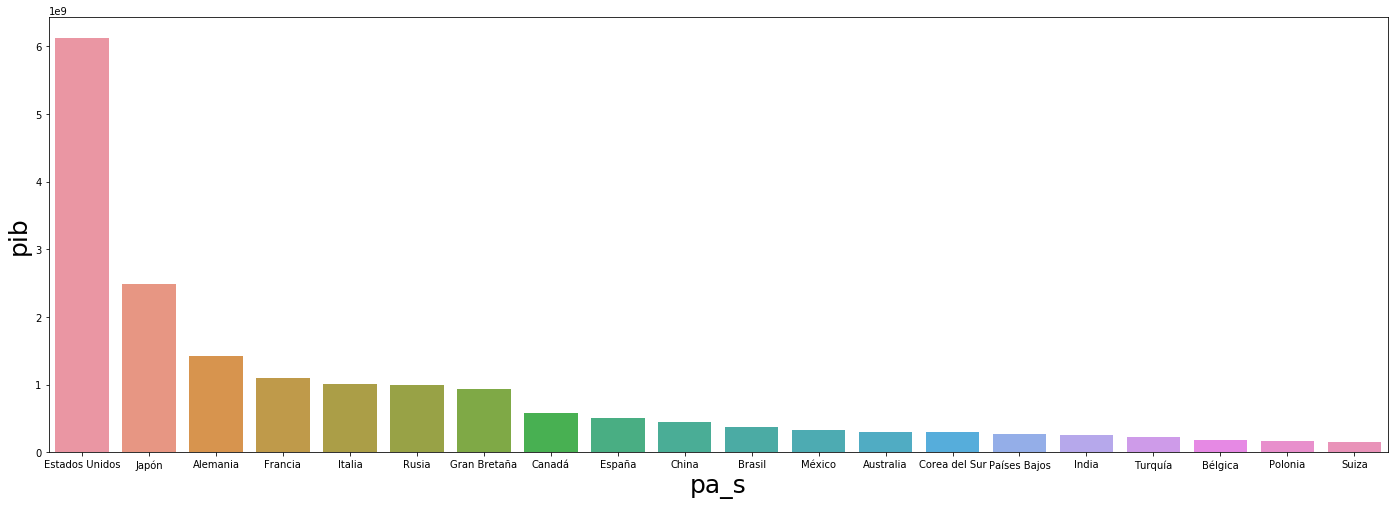

In [24]:
plt.figure(figsize=(24, 8)) #seteamos el tamaño del gráfico
plt.rcParams["axes.labelsize"] = 25
sns.barplot(dfPibHigher20['pa_s'],dfPibHigher20['pib'] )

7. Representa mediante un swarmplot la tasa de natalidad por región y añade como tercera variable categórica el clima. ¿Tiene sentido el gráfico obtenido en relación a los datos? Comenta el resultado.

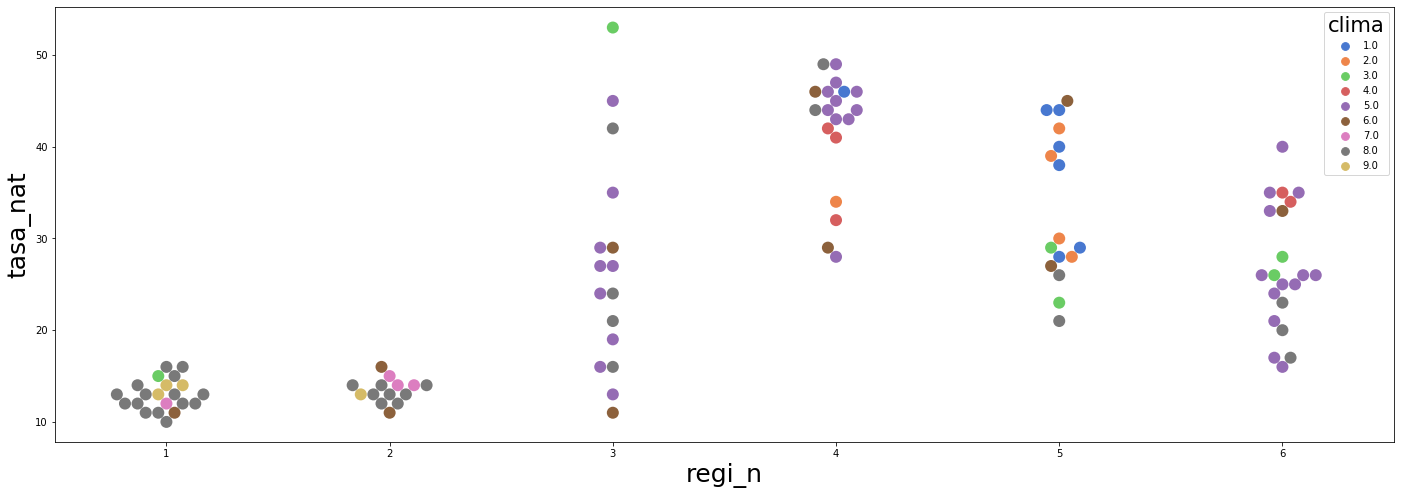

In [25]:
plt.figure(figsize=(24, 8))
plt.rcParams["axes.labelsize"] = 25
ax = sns.swarmplot(y=df['tasa_nat'], x=df['regi_n'], hue=df['clima'] , size=12, palette="muted" )

8. Representa mediante un boxplot la tasa de natalidad por clima. Comenta los resultados.

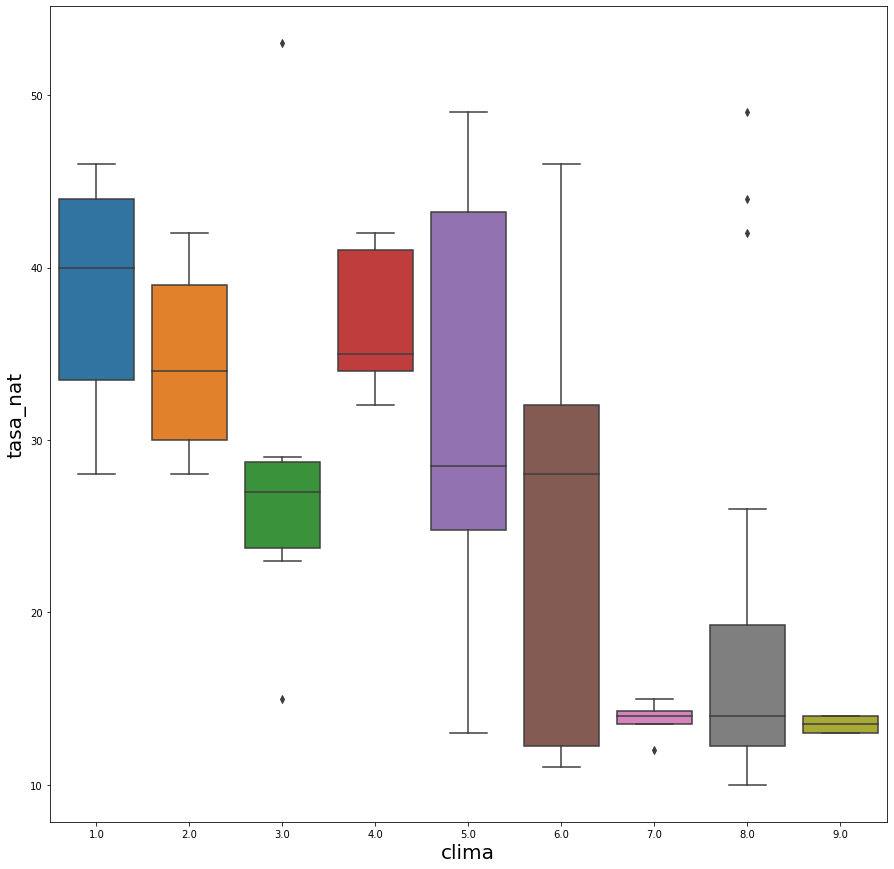

In [26]:
plt.figure(figsize=(15, 15))
plt.rcParams["axes.labelsize"] = 20
ax = sns.boxplot(x=df['clima'], y=df['tasa_nat'])

9. Selecciona dos o más variables que te llamen la atención y analiza los datos mediante las gráficas o mediciones estadísticas que consideres oportunas y comenta los resultados que obtengas.

In [44]:
plt.figure(figsize=(15, 15))

#Para poder hacer un primer análisis de nuestros datos podemos hacer un scatter de todas las columnas
#respecto al resto y ver la distribución que siguen.
#-> si queremos ver el resultado hay que descomentar la siguiente línea.

#ax = sns.pairplot(dfPib)


<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

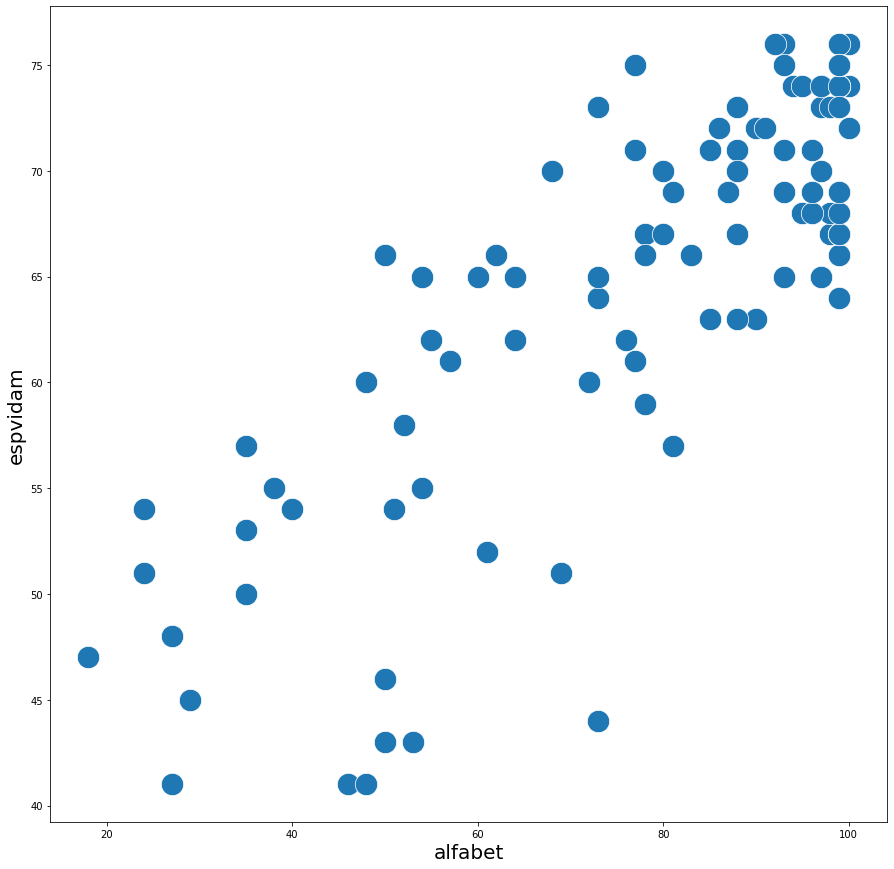

In [48]:
#Aunque podemos hacer un scatter por pares de columnas
plt.figure(figsize=(15, 15))
ax = sns.scatterplot(df['alfabet'],  df['espvidam'],s=500)  

Como podemos ver, esta manera de mostrar datos nos hace ver de manera sencilla si dos columnas del dataset tienen relación entre sí. 

En este caso hemos elegido las columnas de esperanza de vida de las mujeres y la alfabetización de la población. Se puede apreciar que la esperanza de vida de los hombres aumenta conforme la proporción de alfabetización de la población aumenta. 

Esto nos lleva a pensar que debería pasar lo mismo con la esperanza de vida de las mujeres, ya que a priori no hay ninguna hipótesis para plantear lo contrario.

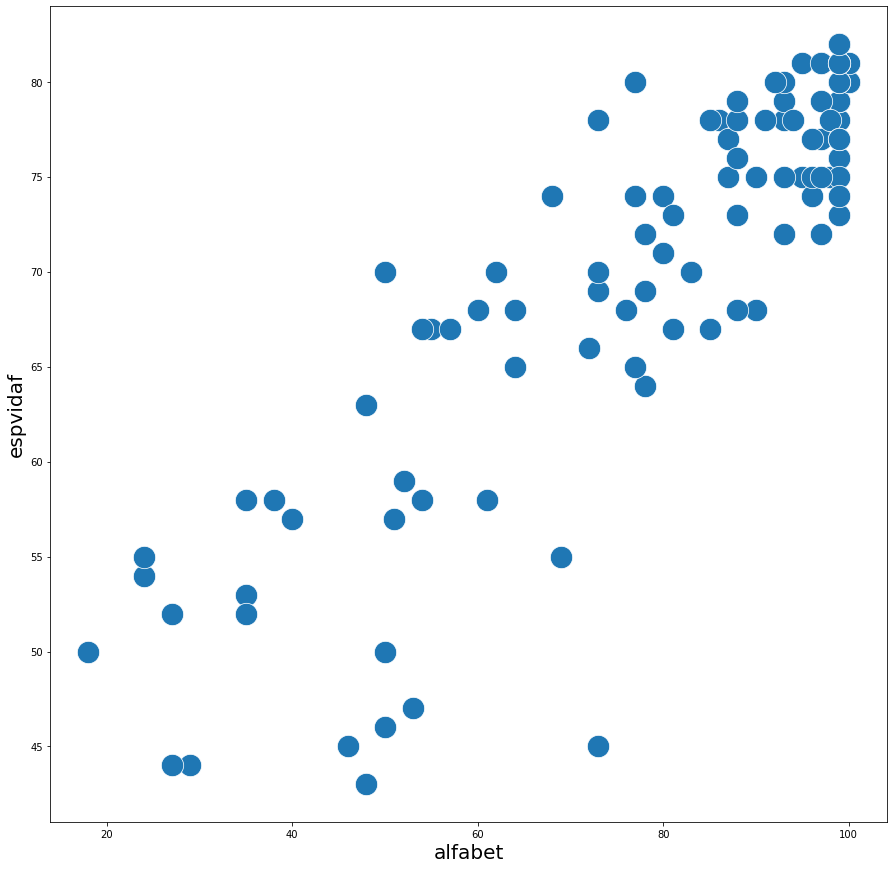

In [49]:
plt.figure(figsize=(15, 15))
ax = sns.scatterplot(df['alfabet'],  df['espvidaf'],s=500)  

Como es lógico, sigue una distribución similar a la anterior. 

Lo siguiente que nos interesa saber es si el pib per cápita es una variable de interés en nuestro estudio. Para ello cogemos la columna del pib per cápita y, obteniendo el valor mínimo y máximo, dividimos en 5 partes iguales el intervalo de valores del pib.(Esto es debido a la falta de conocimiento del tema, ya que no sabemos si dividir entre 5 de manera equidistante es lo más correcto.) Para los valores altos daremos el valor 1 e iremos bajando hasta que para los valores de pib per cápita más bajo, éste valdrá 5. 

[  122.   4792.4  9462.8 14133.2 18803.6]
109
[5, 5, 2, 4, 5, 4, 2, 2, 4, 5, 4, 2, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 4, 5, 4, 5, 2, 5, 5, 5, 2, 3, 1, 4, 4, 5, 2, 1, 5, 5, 5, 2, 4, 5, 5, 5, 2, 4, 5, 5, 5, 5, 3, 2, 3, 2, 1, 5, 5, 4, 4, 5, 5, 4, 4, 5, 5, 5, 5, 5, 2, 2, 4, 2, 5, 5, 5, 5, 5, 4, 5, 4, 5, 5, 5, 4, 5, 2, 5, 5, 5, 2, 1, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5]


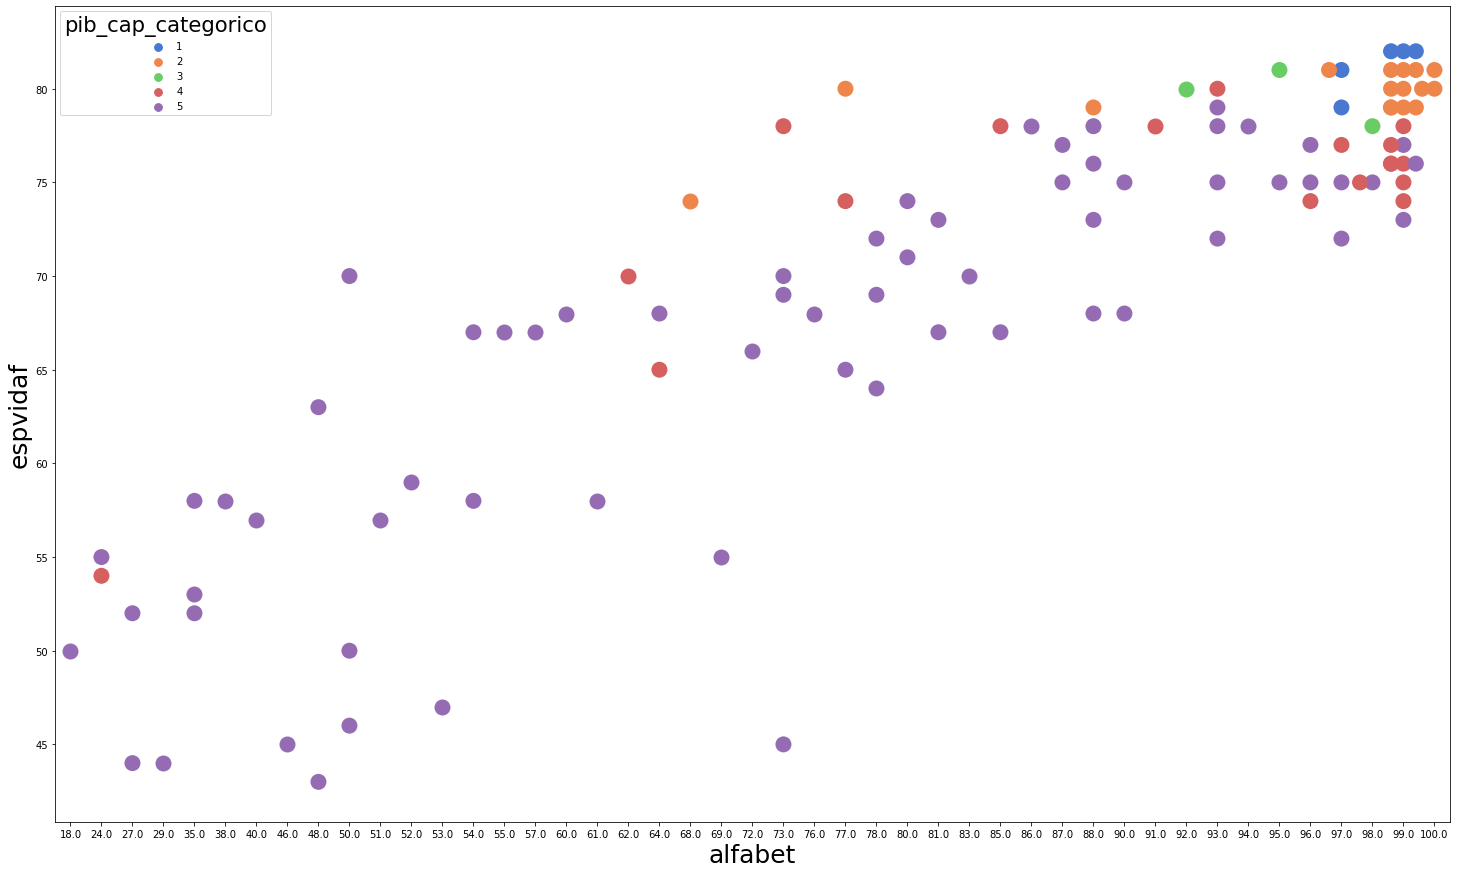

In [78]:
min_pib= min(df['pib_cap'])
max_pib= max(df['pib_cap'])
range_pib = np.linspace(min_pib, max_pib, 5, endpoint=False)
    
print(range_pib)
print(len(df))

pib_cap_categorico = []
for i in range(0, len(df)):
    pib_cap = df['pib_cap'][i]
    if pib_cap > range_pib[4]:
        valor = 1
    elif pib_cap > range_pib[3]:
        valor = 2
    elif pib_cap > range_pib[2]:
        valor = 3
    elif pib_cap > range_pib[1]:
        valor = 4
    elif pib_cap > range_pib[0]:
        valor = 5
        
    pib_cap_categorico.append(valor)
    
print(pib_cap_categorico)
    
df['pib_cap_categorico'] = pib_cap_categorico


plt.figure(figsize=(25,15))
plt.rcParams["axes.labelsize"] = 25
ax = sns.swarmplot(y=df['espvidaf'], x=df['alfabet'], hue=df['pib_cap_categorico'] , size=16, palette="muted" )


Si hacemos lo mismo para la esperanza de vida masculina:

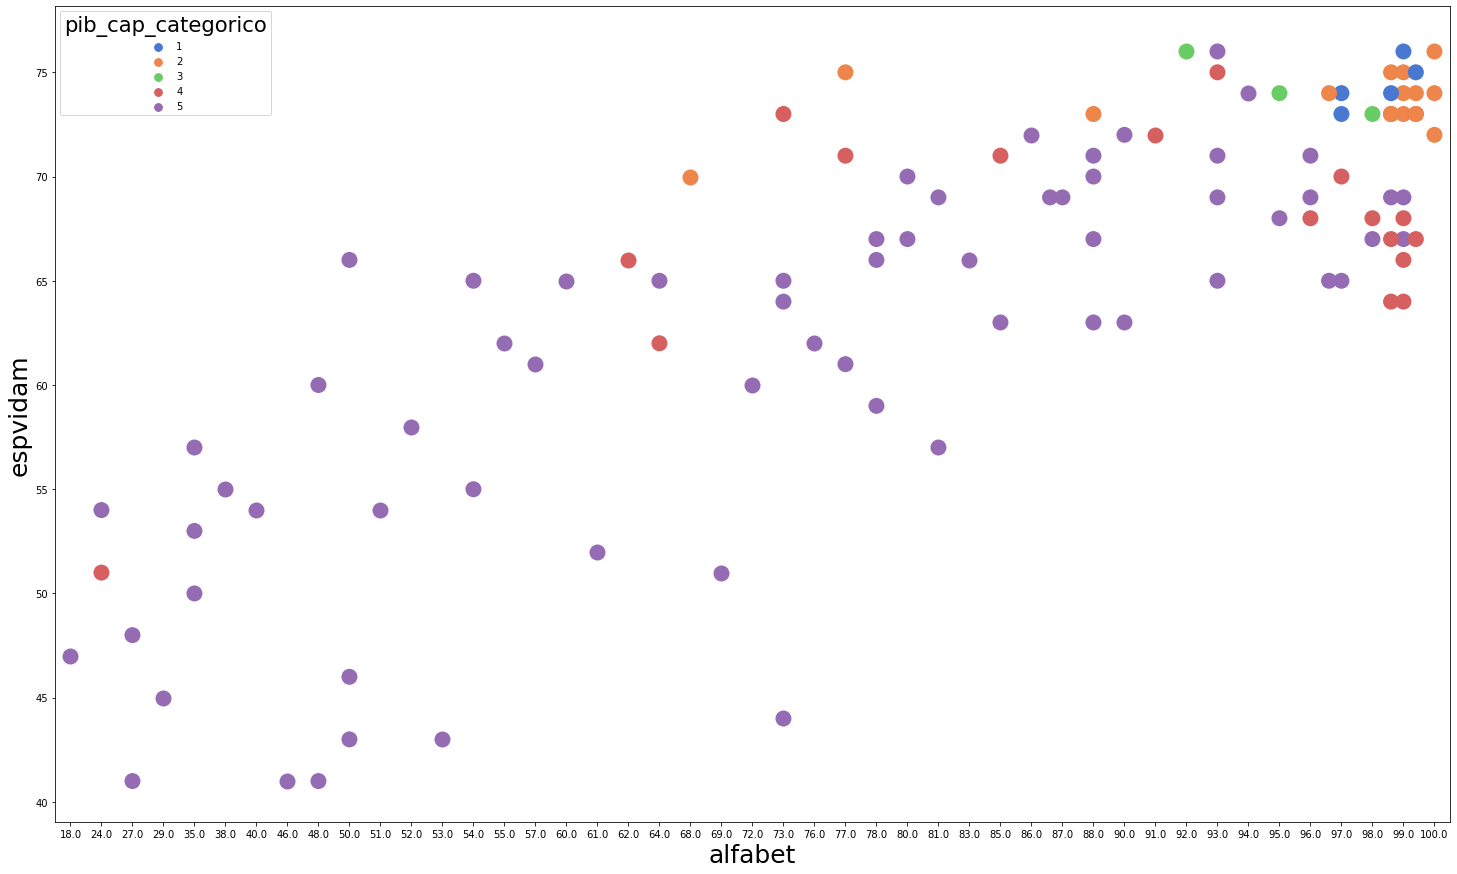

In [79]:
plt.figure(figsize=(25,15))
plt.rcParams["axes.labelsize"] = 25
ax = sns.swarmplot(y=df['espvidam'], x=df['alfabet'], hue=df['pib_cap_categorico'] , size=16, palette="muted" )


Vamos a analizar los casos. Podemos ver que un pib per capita alto coincide siempre (exceptuando dos casos de color naranja a mitad de tabla) con un porcentaje de alfabetización muy alto de la población y ésta nos está dando una esperanza de vida alta siempre (puntos azules, naranjas y verdes).

Si nos fijamos en los puntos rojos, pero sobre todos los morados, vemos que ahí se distribuye el pib per cápita de la mayoría de los países, lo que nos indica que no hemos elegido de manera correcta las divisiones en el pib per cápita debido a nuestra falta de conocimiento de lo que estamos estudiando. Pero si nos basamos en las divisiones elegidas, podemos decir que el quinto valor del pib per cápita aúna un gran conjunto de países y podemos ver que las opciones son múltiples. Es decir, pertenecer a un país con este pib per cápita no te garantiza un índice de alfabetización alto y por ello tampoco se puede garantizar una esperanza de vida alta (en hombres y mujeres), aunque hay casos en los que se da.